In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
pd.set_option('mode.chained_assignment',  None)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [218]:
train_data = pd.read_csv('train_merge_data.csv')
test_data = pd.read_csv('test_merge_data.csv')

C:\Users\ynjn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [219]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   id            int64  
 2   date          object 
 3   store_nbr     int64  
 4   family        object 
 5   sales         float64
 6   onpromotion   int64  
 7   dcoilwtico    float64
 8   type_x        object 
 9   locale        object 
 10  locale_name   object 
 11  description   object 
 12  transferred   object 
 13  transactions  float64
 14  city          object 
 15  state         object 
 16  type_y        object 
 17  cluster       int64  
 18  Year          int64  
 19  Month         int64  
 20  Weekend       int64  
 21  Weekday       int64  
 22  trend         int64  
 23  NewYearsDay   bool   
dtypes: bool(1), float64(3), int64(10), object(10)
memory usage: 538.9+ MB


In [220]:
train_data.drop(columns = ['Unnamed: 0', 'id', 'description'], inplace = True)

In [221]:
# National인 holiday 정보만 남긴다.
mask = (train_data.locale != 'National')
train_data.type_x[mask] = 'Empty'
train_data.locale[mask] = 'Empty'
train_data.locale_name[mask] = 'Empty'
train_data.transferred[mask] = 'Empty'

mask = (test_data.locale != 'National')
test_data.type_x[mask] = 'Empty'
test_data.locale[mask] = 'Empty'
test_data.locale_name[mask] = 'Empty'
test_data.transferred[mask] = 'Empty'

In [222]:
mask = (train_data.transferred == 'True') # 다른날로 대체됨.
train_data.type_x[mask] = 'Empty'
train_data.locale[mask] = 'Empty'
train_data.locale_name[mask] = 'Empty'
train_data.transferred[mask] = 'Empty'

mask = (test_data.transferred == 'True')
test_data.type_x[mask] = 'Empty'
test_data.locale[mask] = 'Empty'
test_data.locale_name[mask] = 'Empty'
test_data.transferred[mask] = 'Empty'

In [223]:
train_data.transferred[train_data.transferred != 'Empty'] = 'False'
test_data.transferred[test_data.transferred != 'Empty'] = 'False'

In [224]:
train_data.transferred[train_data.transferred != 'Empty'] = 'False'
test_data.transferred[test_data.transferred != 'Empty'] = 'False'

In [225]:
# 주말이거나 holiday인 날을 no_work_day로 지정
train_data['no_work_day'] = train_data['Weekend'] | mask

In [226]:
train_data.drop(columns = ['type_x', 'locale', 'locale_name', 'transferred', 'Weekend'], inplace = True)
test_data.drop(columns = ['Unnamed: 0', 'id', 'type_x', 'locale', 'locale_name', 'description', 'transferred'], inplace = True)

In [227]:
test_data.rename(columns = {'Weekend':'no_work_day'}, inplace = True)

In [228]:
groups = train_data.groupby(['type_y','cluster','store_nbr']).median()
groups.dropna(axis=0,inplace=True)
groups['sales']

type_y  cluster  store_nbr
A       5        44           75.0000
        11       45           62.0000
                 49           48.0000
                 52            0.0000
        14       46           36.7900
                 47           52.0000
                 48           30.0000
                 50           32.0000
        17       51           27.0000
B       6        9            18.0000
                 11           15.0000
                 20            0.0000
                 21            0.0000
                 34           10.0000
                 39           16.0000
        10       31           10.0000
        16       18            8.0000
C       3        16            6.0000
                 30            5.0000
                 32            3.0000
                 33            9.0000
                 35            3.0000
                 40            9.0000
                 54            7.0000
        7        14            6.0000
                 22    

In [190]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [229]:
stores_df=train_data[['store_nbr','sales']]
stores_df.set_index('store_nbr',inplace=True)
stores_df=stores_df.apply(lambda x: x.astype('float64'))
stores_df=stores_df.groupby('store_nbr').median()


C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


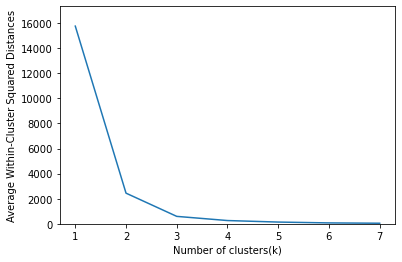

In [230]:
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(stores_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 8), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [231]:
memb=fcluster(linkage(stores_df, method='average'),4,criterion='maxclust')
stores_df['store_cl']=memb
stores_df

,sales,store_cl
store_nbr,,
1,19.0000,4
2,23.4825,4
3,64.0000,2
4,19.0000,4
5,19.0000,4
6,29.0000,3
7,28.0000,3
8,39.0000,3
9,18.0000,4


In [232]:
train_data=train_data.merge(stores_df.drop(columns='sales'), left_on = 'store_nbr', right_on = 'store_nbr', how = 'left')
train_data.drop(columns=['store_nbr'],inplace=True)
train_data['store_cl']=train_data['store_cl'].astype('category')
train_data.head()

,date,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_y,cluster,Year,Month,Weekday,trend,NewYearsDay,no_work_day,store_cl
0,2013-01-01,AUTOMOTIVE,0.0,0,93.14,1420.876311,Quito,Pichincha,D,13,2013,1,1,0,True,False,4
1,2013-01-01,BABY CARE,0.0,0,93.14,1420.876311,Quito,Pichincha,D,13,2013,1,1,0,True,False,4
2,2013-01-01,BEAUTY,0.0,0,93.14,1420.876311,Quito,Pichincha,D,13,2013,1,1,0,True,False,4
3,2013-01-01,BEVERAGES,0.0,0,93.14,1420.876311,Quito,Pichincha,D,13,2013,1,1,0,True,False,4
4,2013-01-01,BOOKS,0.0,0,93.14,1420.876311,Quito,Pichincha,D,13,2013,1,1,0,True,False,4


In [233]:
test_data=test_data.merge(stores_df.drop(columns='sales'), left_on = 'store_nbr', right_on = 'store_nbr', how = 'left')
test_data.drop(columns=['store_nbr'],inplace=True)
test_data['store_cl']=test_data['store_cl'].astype('category')
test_data.head()

,date,family,onpromotion,dcoilwtico,transactions,city,state,type_y,cluster,Year,Month,no_work_day,Weekday,trend,NewYearsDay,store_cl
0,2017-08-16,AUTOMOTIVE,0,46.8,1448.259579,Quito,Pichincha,D,13,2017,8,0,2,1688,False,4
1,2017-08-16,BABY CARE,0,46.8,1448.259579,Quito,Pichincha,D,13,2017,8,0,2,1688,False,4
2,2017-08-16,BEAUTY,2,46.8,1448.259579,Quito,Pichincha,D,13,2017,8,0,2,1688,False,4
3,2017-08-16,BEVERAGES,20,46.8,1448.259579,Quito,Pichincha,D,13,2017,8,0,2,1688,False,4
4,2017-08-16,BOOKS,0,46.8,1448.259579,Quito,Pichincha,D,13,2017,8,0,2,1688,False,4


families_df=train_data[['family','sales']]
families_df.set_index('family',inplace=True)
families_df=families_df.groupby('family').median()

from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(families_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

memb=fcluster(linkage(families_df, method='average'),6,criterion='maxclust')
families_df['family_cl']=memb
families_df

train_data=train_data.merge(families_df.drop(columns='sales'), left_on = 'family', right_on = 'family', how = 'left')
train_data.drop(columns=['family'],inplace=True)
train_data['family_cl']=train_data['family_cl'].astype('category')
train_data.head()

test_data=test_data.merge(families_df.drop(columns='sales'), left_on = 'family', right_on = 'family', how = 'left')
test_data.drop(columns=['family'],inplace=True)
test_data['family_cl']=test_data['family_cl'].astype('category')
test_data.head()

In [234]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype   
---  ------        -----   
 0   date          object  
 1   family        object  
 2   sales         float64 
 3   onpromotion   int64   
 4   dcoilwtico    float64 
 5   transactions  float64 
 6   city          object  
 7   state         object  
 8   type_y        object  
 9   cluster       int64   
 10  Year          int64   
 11  Month         int64   
 12  Weekday       int64   
 13  trend         int64   
 14  NewYearsDay   bool    
 15  no_work_day   bool    
 16  store_cl      category
dtypes: bool(2), category(1), float64(3), int64(6), object(5)
memory usage: 358.3+ MB


In [235]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   date          28512 non-null  object  
 1   family        28512 non-null  object  
 2   onpromotion   28512 non-null  int64   
 3   dcoilwtico    28512 non-null  float64 
 4   transactions  28512 non-null  float64 
 5   city          28512 non-null  object  
 6   state         28512 non-null  object  
 7   type_y        28512 non-null  object  
 8   cluster       28512 non-null  int64   
 9   Year          28512 non-null  int64   
 10  Month         28512 non-null  int64   
 11  no_work_day   28512 non-null  int64   
 12  Weekday       28512 non-null  int64   
 13  trend         28512 non-null  int64   
 14  NewYearsDay   28512 non-null  bool    
 15  store_cl      28512 non-null  category
dtypes: bool(1), category(1), float64(2), int64(7), object(5)
memory usage: 3.3+ MB


In [236]:
train_data.drop(columns=['Year'],inplace=True)
test_data.drop(columns=['Year'],inplace=True)

In [237]:
train_1=train_data.drop(columns=['state','type_y'])
test_1=test_data.drop(columns=['state','type_y'])

train_2=train_data.drop(columns=['state','cluster'])
test_2=test_data.drop(columns=['state','cluster'])

train_3=train_data.drop(columns=['city','type_y'])
test_3=test_data.drop(columns=['city','type_y'])

train_4=train_data.drop(columns=['city','cluster'])
test_4=test_data.drop(columns=['city','cluster'])

In [264]:
sub_train_data = train_1[train_1.date <= '2016-07-31']
valid_data = train_1[train_1.date >= '2016-08-01']

In [265]:
print(train_data.shape)
print(sub_train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(3054348, 15)
(2368278, 14)
(686070, 14)
(28512, 14)


In [266]:
# 검증 과정에서 사용할 데이터
sub_train_data.drop(columns = ['date'], inplace = True)
valid_data.drop(columns = ['date'], inplace = True)
# 최종 모델 훈련에서 사용할 데이터
train_data.drop(columns = ['date'], inplace = True)
test_data.drop(columns = ['date'], inplace = True)


KeyError: "['date'] not found in axis"

In [267]:
X_sub_train_data = sub_train_data.drop(columns = ['sales'])
y_sub_train_data = sub_train_data['sales']

X_valid_data = valid_data.drop(columns = ['sales'])
y_valid_data = valid_data['sales']

In [268]:
train_data.columns

Index(['family', 'sales', 'onpromotion', 'dcoilwtico', 'transactions', 'city',
       'state', 'type_y', 'cluster', 'Month', 'Weekday', 'trend',
       'NewYearsDay', 'no_work_day', 'store_cl'],
      dtype='object')

In [270]:
# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preproc = ColumnTransformer(
    [('standard', StandardScaler(), ['onpromotion', 'dcoilwtico', 'transactions']),
     ('cat', OneHotEncoder(sparse = False, drop = 'first'), ['store_cl', 'family','city'])],
     remainder = 'passthrough')

preproc.fit(X_sub_train_data)
cat_features_names = preproc.named_transformers_['cat'].get_feature_names()
labels = np.concatenate([['onpromotion', 'dcoilwtico', 'transactions'], cat_features_names, ['cluster','Month', 'Weekday', 'trend', 'NewYearsDay','no_work_day']])

X_sub_train_data_trans = pd.DataFrame(preproc.transform(X_sub_train_data), columns = labels)
X_valid_data_trans = pd.DataFrame(preproc.transform(X_valid_data), columns = labels)

In [271]:
# modeling
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_sub_train_data_trans, y_sub_train_data)

LinearRegression()

In [272]:
train_pred = model.predict(X_sub_train_data_trans)
valid_pred = model.predict(X_valid_data_trans)

In [273]:
train_pred[train_pred < 0] = 0
valid_pred[valid_pred < 0] = 0

In [274]:
from sklearn.metrics import mean_squared_log_error

In [275]:
mean_squared_log_error(y_sub_train_data, train_pred)

6.13522107835651

In [276]:
mean_squared_log_error(y_valid_data, valid_pred)

5.256747666529892

In [277]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(min_samples_split = 10)
rfmodel.fit(X_sub_train_data_trans[-10000:], y_sub_train_data[-10000:])

RandomForestRegressor(min_samples_split=10)

In [278]:
#train_pred = rfmodel.predict(X_sub_train_data_trans)
valid_pred = rfmodel.predict(X_valid_data_trans)

In [279]:
#train_pred[train_pred < 0] = 0
valid_pred[valid_pred < 0] = 0

In [280]:
mean_squared_log_error(y_valid_data, valid_pred)

0.8191614538214053

In [281]:
X_train_data = train_data.drop(columns = ['sales'])
y_train_data = train_data['sales']

In [284]:
preproc.fit(X_train_data)
cat_features_names = preproc.named_transformers_['cat'].get_feature_names()
labels = np.concatenate([['onpromotion', 'dcoilwtico', 'transactions'], cat_features_names, ['cluster', 'Month', 'Weekday', 'trend', 'NewYearsDay','no_work_day']])

X_train_data_trans = pd.DataFrame(preproc.transform(X_train_data), columns = labels)
X_test_data_trans = pd.DataFrame(preproc.transform(test_data), columns = labels)

ValueError: Shape of passed values is (3054348, 67), indices imply (3054348, 65)

In [ ]:
rfmodel = RandomForestRegressor(min_samples_split = 10)
rfmodel.fit(X_train_data_trans[-10000:], y_train_data[-10000:])

In [ ]:
test_pred = rfmodel.predict(X_test_data_trans)

In [ ]:
test_pred[test_pred < 0] = 0

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission['sales'] = test_pred

In [ ]:
submission.to_csv('submission.csv', index = False)